In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
maxlen = 500
embedding_dim = 32

In [3]:
# Load Dataset
(x_train,y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)

# Pad Sequences
x_train = pad_sequences(x_train, maxlen = maxlen)
x_test = pad_sequences(x_test, maxlen = maxlen)

In [4]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length = maxlen),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid') # Binary Output
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 5, batch_size = 128, validation_split = 0.2)

Epoch 1/5
157/157 [==============================] - 6s 38ms/step - loss: 0.5274 - accuracy: 0.6994 - val_loss: 0.2960 - val_accuracy: 0.8808
Epoch 2/5
157/157 [==============================] - 6s 40ms/step - loss: 0.1748 - accuracy: 0.9344 - val_loss: 0.2878 - val_accuracy: 0.8866
Epoch 3/5
157/157 [==============================] - 6s 38ms/step - loss: 0.0444 - accuracy: 0.9905 - val_loss: 0.3373 - val_accuracy: 0.8842
Epoch 4/5
157/157 [==============================] - 6s 41ms/step - loss: 0.0104 - accuracy: 0.9991 - val_loss: 0.3910 - val_accuracy: 0.8800
Epoch 5/5
157/157 [==============================] - 6s 38ms/step - loss: 0.0032 - accuracy: 0.9998 - val_loss: 0.4174 - val_accuracy: 0.8812


In [5]:
y_pred_probabilities = model.predict(x_test)

# y_pred = np.argmax(y_pred_probabilities, axis = 1)
y_pred = (y_pred_probabilities > 0.5).astype('int64')

accuracy = accuracy_score(y_pred, y_test)
accuracy

782/782 [==============================] - 2s 2ms/step


0.87216

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     12500
           1       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



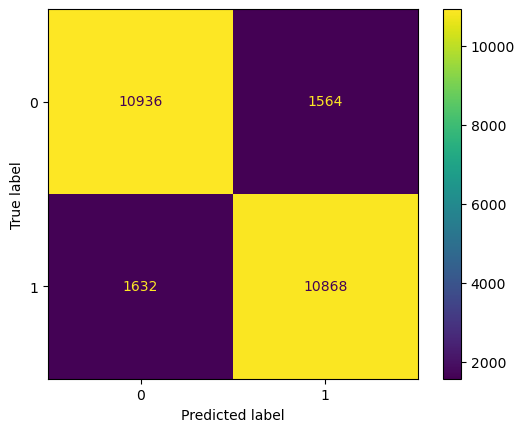

In [7]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [8]:
# model = Sequential([
#     Embedding(vocab_size, embedding_dim, input_length=maxlen),
#     Flatten(),
#     Dense(64, activation="relu"),
#     Dense(1, activation="sigmoid")
# ])


# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# model.fit(X_Train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# y_pred_prob = model.predict(X_Test)

# y_pred = (y_pred_prob>0.5).astype("int64")

# accuracy_score = accuracy_score(y_pred, y_Test)
